# IMPORTED LIBRARIES

In [145]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [96]:
df = pd.read_csv("Online Retail.csv")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01/12/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01/12/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01/12/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01/12/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01/12/2010 8:26,3.39,17850.0,United Kingdom


# EXPLORATORY DATA ANALYSIS

In [97]:
dp = df[df["UnitPrice"]<0]
dp

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,12/08/2011 14:51,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,12/08/2011 14:52,-11062.06,NaN,United Kingdom


In [98]:
do = df[df['UnitPrice'] ==0]
do.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,01/12/2010 11:52,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,01/12/2010 14:32,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,01/12/2010 14:33,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,01/12/2010 14:33,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,01/12/2010 14:34,0.0,NaN,United Kingdom


# Filtering Returned Products

In [116]:
df = df[(df["Quantity"] < 0)]
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
238,C536391,21980,PACK OF 12 RED RETROSPOT TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom


# Removing Invalid Stockcode

In [100]:
invalid_stockcodes = ["POST", "DOT", "BANK CHARGES", "AMAZONFEE", "B","M","D",
                      "gift_0001_10", "gift_0001_20", "gift_0001_30", 
                      "gift_0001_40", "gift_0001_50"]

# Remove rows where StockCode is in the invalid list
df = df[~df["StockCode"].isin(invalid_stockcodes)]
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,01/12/2010 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,01/12/2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,01/12/2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,01/12/2010 10:24,0.29,17548.0,United Kingdom
238,C536391,21980,PACK OF 12 RED RETROSPOT TISSUES,-24,01/12/2010 10:24,0.29,17548.0,United Kingdom


# Checking For Missing Values

In [5]:
#Checking Missing Values
df.isnull().sum()

NameError: name 'df' is not defined

# Dropping Missing Values

In [102]:
#Dropping the misssing values
df.dropna(subset=["Description", "CustomerID"], inplace=True)

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8556 entries, 154 to 541717
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    8556 non-null   object 
 1   StockCode    8556 non-null   object 
 2   Description  8556 non-null   object 
 3   Quantity     8556 non-null   int64  
 4   InvoiceDate  8556 non-null   object 
 5   UnitPrice    8556 non-null   float64
 6   CustomerID   8556 non-null   float64
 7   Country      8556 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 601.6+ KB


# Changing Date Column To Date Format

In [104]:
#Convert InvoiceDate to datetime with a specific format
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"], format="%d/%m/%Y %H:%M")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
238,C536391,21980,PACK OF 12 RED RETROSPOT TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom


In [155]:
#Converting the Customer Id to integer and the InvoiceDtae to DateTime
df["CustomerID"] = df["CustomerID"].astype(int)
df["Month"] = df["InvoiceDate"].dt.strftime("%B")

In [157]:
#Renaming the Description to Products
df = df.rename(columns={"Description": "Product"})
df.head()

,InvoiceNo,StockCode,Product,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311,United Kingdom,December
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548,United Kingdom,December
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom,December
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom,December
238,C536391,21980,PACK OF 12 RED RETROSPOT TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom,December


# RETURNED PRODUCTS

# Grouping Most Returned Products

In [136]:
# Group by product and sum theabsolute values of returned quantities
most_returned_products =df.groupby("Product")["Quantity"].sum().abs()

#Sortto see the most returned products first
most_returned_products = most_returned_products.sort_values(ascending=False).reset_index()

#Top 10 most returned products
most_returned_products.head(10)

,Product,Quantity
0,"PAPER CRAFT , LITTLE BIRDIE",80995
1,MEDIUM CERAMIC TOP STORAGE JAR,74494
2,ROTATING SILVER ANGELS T-LIGHT HLDR,9367
3,FAIRY CAKE FLANNEL ASSORTED COLOUR,3150
4,PINK BLUE FELT CRAFT TRINKET BOX,2617
5,WHITE HANGING HEART T-LIGHT HOLDER,2578
6,GIN + TONIC DIET METAL SIGN,2030
7,HERB MARKER BASIL,1527
8,FELTCRAFT DOLL MOLLY,1447
9,TEA TIME PARTY BUNTING,1424


# TOP RETURNED PRODUCTS

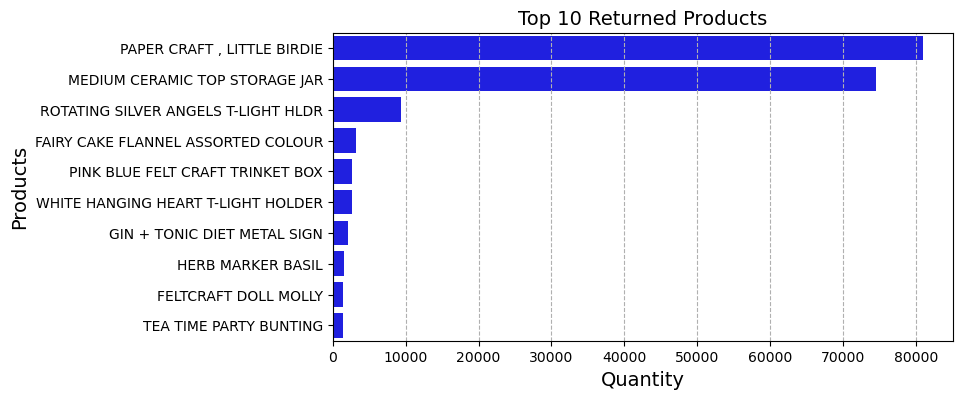

In [143]:
# Set figure size
plt.figure(figsize=(8, 4))

# Create barplot (fixing variable name and column names)
sns.barplot(x="Quantity", y="Product", data=most_returned_products.head(10), color="blue")

# Labelling the Visual
plt.xlabel("Quantity", fontsize=14)
plt.ylabel("Products", fontsize=14)
plt.title("Top 10 Returned Products", fontsize=14)
plt.grid(axis="x", linestyle="--")

# Show the plot
plt.show()

# MONTHLY TREND OF RETURNED PRODUCTS

# Grouping Monthly Returns

In [161]:
# Aggregate returned product quantity by month
returns_by_month = df.groupby("Month")["Quantity"].sum().abs().reset_index()
returns_by_month

,Month,Quantity
0,April,13599
1,August,11659
2,December,99449
3,February,2576
4,January,79717
5,July,5938
6,June,6650
7,March,3496
8,May,4051
9,November,11698


In [169]:
# Sort months in chronological order
month_order = ["January", "February", "March", "April", "May", "June", "July", "August", 
               "September", "October", "November", "December"]

returns_by_month["Month"] = pd.Categorical(returns_by_month["Month"], categories=month_order, ordered=True)
returns_by_month = returns_by_month.sort_values("Month")

# Convert Quantity to absolute values
returns_by_month["Quantity"] = returns_by_month["Quantity"].abs()

returns_by_month

,Month,Quantity
4,January,79717
3,February,2576
7,March,3496
0,April,13599
8,May,4051
6,June,6650
5,July,5938
1,August,11659
11,September,7076
10,October,23592


# Plotting Monthly Trend

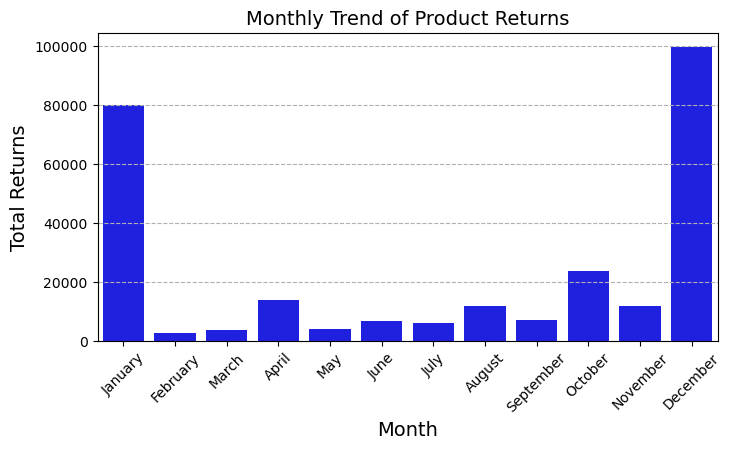

In [177]:
# Plot
plt.figure(figsize=(8, 4))
sns.barplot(x="Month", y="Quantity", data=returns_by_month, color="blue")

# Labels & Title
plt.xlabel("Month", fontsize=14)
plt.ylabel("Total Returns", fontsize=14)
plt.title("Monthly Trend of Product Returns", fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--")

# Show plot
plt.show()

# Grouping the Monthly Returned By Country

In [191]:
#Group Country by Absolute value of Quantity
return_country= df.groupby("Country")["Quantity"].sum().abs().reset_index()
return_country = return_country.sort_values(by ="Quantity",ascending = False)
return_country.head(10)

,Country,Quantity
25,United Kingdom,256233
7,EIRE,4192
11,Germany,1798
10,France,1579
24,USA,1424
21,Spain,1124
14,Japan,795
0,Australia,555
22,Sweden,443
16,Netherlands,324


# Plotting The monthly Returned Products

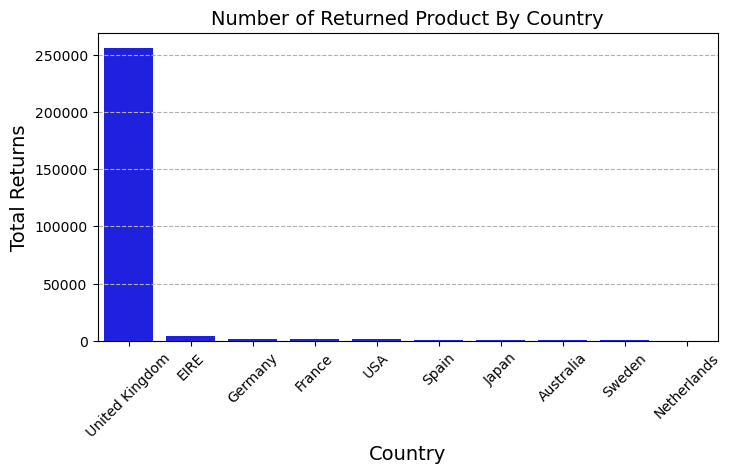

In [193]:
# Plot
plt.figure(figsize=(8, 4))
sns.barplot(x="Country", y="Quantity", data=return_country.head(10), color="blue")

# Labels & Title
plt.xlabel("Country", fontsize=14)
plt.ylabel("Total Returns", fontsize=14)
plt.title("Number of Returned Product By Country", fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--")

# Show plot
plt.show()